# <img style="float: left; padding-right: 20px; width: 100px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> MCD3020 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Profesora:** Paula Aguirre <br>

----

 <h1><center>Ejemplos Complementarios: Extracción de Datos desde la Web </center></h1>
    

## Objetivos de Aprendizaje.

Esta Tarea tiene como objetivo poner en práctica los contenidos del curso vistos hasta ahora, en especial:
- Manejo de librerías `pandas`,`matplotlib`, `requests` y `BeautifulSoup`.
- Manejo de datos estructurado y semi-estructurados.
- Análisis y comprensión de los elementos fundamentales de APIs y códigos HTML de páginas web. 
- Extracción de datos de la via API y scrapping sencillo.

---------

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## Ejemplo 1: API Open Notify ¿Cuántas personas hay en el espacio hoy?

La API Open Notify entrega información actualizada de la ubicación de la Estación Espacial Internacional (ISS), y de las personas que están en el espacio.

http://open-notify.org/Open-Notify-API/People-In-Space/

Esta es una API sencilla, que no tiene argumentos. Por lo tanto, la consulta que se le envía es siempre la misma.

In [2]:
url='http://api.open-notify.org/astros.json'
r=requests.get(url)
r.json()

{'message': 'success',
 'number': 13,
 'people': [{'craft': 'ISS', 'name': 'Sergey Prokopyev'},
  {'craft': 'ISS', 'name': 'Dmitry Petelin'},
  {'craft': 'ISS', 'name': 'Frank Rubio'},
  {'craft': 'Tiangong', 'name': 'Fei Junlong'},
  {'craft': 'Tiangong', 'name': 'Deng Qingming'},
  {'craft': 'Tiangong', 'name': 'Zhang Lu'},
  {'craft': 'ISS', 'name': 'Stephen Bowen'},
  {'craft': 'ISS', 'name': 'Warren Hoburg'},
  {'craft': 'ISS', 'name': 'Sultan Alneyadi'},
  {'craft': 'ISS', 'name': 'Andrey Fedyaev'},
  {'craft': 'Tiangong', 'name': 'Jing Haiping'},
  {'craft': 'Tiangong', 'name': 'Gui Haichow'},
  {'craft': 'Tiangong', 'name': 'Zhu Yangzhu'}]}

In [3]:
df=pd.json_normalize(r.json(),record_path='people')
df

,craft,name
0,ISS,Sergey Prokopyev
1,ISS,Dmitry Petelin
2,ISS,Frank Rubio
3,Tiangong,Fei Junlong
4,Tiangong,Deng Qingming
5,Tiangong,Zhang Lu
6,ISS,Stephen Bowen
7,ISS,Warren Hoburg
8,ISS,Sultan Alneyadi
9,ISS,Andrey Fedyaev


In [4]:
#¿Dónde está la ISS ahora?
url='http://api.open-notify.org/iss-now.json'
r=requests.get(url)
print(r.json())


{'iss_position': {'latitude': '11.8799', 'longitude': '149.9402'}, 'message': 'success', 'timestamp': 1686007118}


In [5]:
url='http://api.open-notify.org/iss-now.json'
r=requests.get(url)
print(r.json())

{'iss_position': {'latitude': '13.0060', 'longitude': '150.7946'}, 'message': 'success', 'timestamp': 1686007140}


## Ejemplo 2: Reporte de indicadores económicos de Chile.

La API **MindicadorChile** es un servicio open source (web service) que entrega los principales indicadores económicos para Chile en formato JSON. Tanto los indicadores diarios como históricos para que desarrolladores puedan utilizarlos en sus aplicaciones o sitios web.

La aplicación mapea constantemente el sitio del Banco Central de Chile manteniendo así nuestra base de datos actualizada con los últimos valores del día. Toda la documentación de la API está disponible en la dirección https://mindicador.cl/.

En este ejercicio, ud. deberá utilizar la API para compilar datos para un análisis de la evolución de la economía chilena en los años 2019, 2020 y 2021, de manera de evaluar el impacto del estallido social y la pandemia.

**Revise cuisadosamente la página y documentación de la API**, y luego desarrolle los siguientes problemas:

**1.1.** Use la API para obtener los valores de siguientes indicadores entre el 1 de enero de 2019, y el 30 de septiembre de 2021: Dólar observado, tasa de desempleo, libra de cobre, índice de precios al consumidor.


In [8]:
url='https://mindicador.cl/api/{tipo_indicador}/{yyyy}'

indicadores=['dolar','libra_cobre','tasa_desempleo','ipc']

years=[2019,2020,2021]

for year in years:
    for ind in indicadores:
        
        resp = requests.get(url.format(tipo_indicador=ind, yyyy=year))
        print(resp.json())
        print()

{'version': '1.7.0', 'autor': 'mindicador.cl', 'codigo': 'dolar', 'nombre': 'Dólar observado', 'unidad_medida': 'Pesos', 'serie': [{'fecha': '2019-12-30T03:00:00.000Z', 'valor': 744.62}, {'fecha': '2019-12-27T03:00:00.000Z', 'valor': 746.66}, {'fecha': '2019-12-26T03:00:00.000Z', 'valor': 751.04}, {'fecha': '2019-12-24T03:00:00.000Z', 'valor': 754.27}, {'fecha': '2019-12-23T03:00:00.000Z', 'valor': 749.83}, {'fecha': '2019-12-20T03:00:00.000Z', 'valor': 752.6}, {'fecha': '2019-12-19T03:00:00.000Z', 'valor': 752.3}, {'fecha': '2019-12-18T03:00:00.000Z', 'valor': 756.95}, {'fecha': '2019-12-17T03:00:00.000Z', 'valor': 762.83}, {'fecha': '2019-12-16T03:00:00.000Z', 'valor': 766.76}, {'fecha': '2019-12-13T03:00:00.000Z', 'valor': 768.69}, {'fecha': '2019-12-12T03:00:00.000Z', 'valor': 772.93}, {'fecha': '2019-12-11T03:00:00.000Z', 'valor': 778.14}, {'fecha': '2019-12-10T03:00:00.000Z', 'valor': 771.29}, {'fecha': '2019-12-09T03:00:00.000Z', 'valor': 779.04}, {'fecha': '2019-12-06T03:00:00.

**1.2.** Para cada indicador, genere un único DataFrame que contenga las siguientes columnas: fecha, valor. El DataFrame debe incluir todos los reportes disponibles para dicho indicador en el rango de fechas indicado, y las fechas deben estar en orden cronológico. Para ello, le pueden ser de utilidad las siguientes funciones de pandas: pd.to_datetime(),DataFrame.sort_values().


In [6]:
frames={}
for ind in indicadores:
    df=pd.DataFrame(columns=['fecha','valor'])
    for year in years:
        url='https://mindicador.cl/api/%s/%s'%(ind,year)
        print(url)
        r=requests.get(url)
        df=df.append(pd.json_normalize(r.json(),record_path='serie'))
    frames[ind]=df

    

https://mindicador.cl/api/dolar/2019
https://mindicador.cl/api/dolar/2020
https://mindicador.cl/api/dolar/2021
https://mindicador.cl/api/libra_cobre/2019
https://mindicador.cl/api/libra_cobre/2020
https://mindicador.cl/api/libra_cobre/2021
https://mindicador.cl/api/tasa_desempleo/2019
https://mindicador.cl/api/tasa_desempleo/2020
https://mindicador.cl/api/tasa_desempleo/2021
https://mindicador.cl/api/ipc/2019
https://mindicador.cl/api/ipc/2020
https://mindicador.cl/api/ipc/2021


**1.3.** Genere una figura con cuatro paneles o subplots. En cada uno de ellos, grafique la serie de tiempo de los indicadores analizados, siguiendo las reglas básicas de formato de gráficos (ejes, títulos, etiquetas, etc.). A continuación se muestra un ejemplo de la figura a generar:

<div>
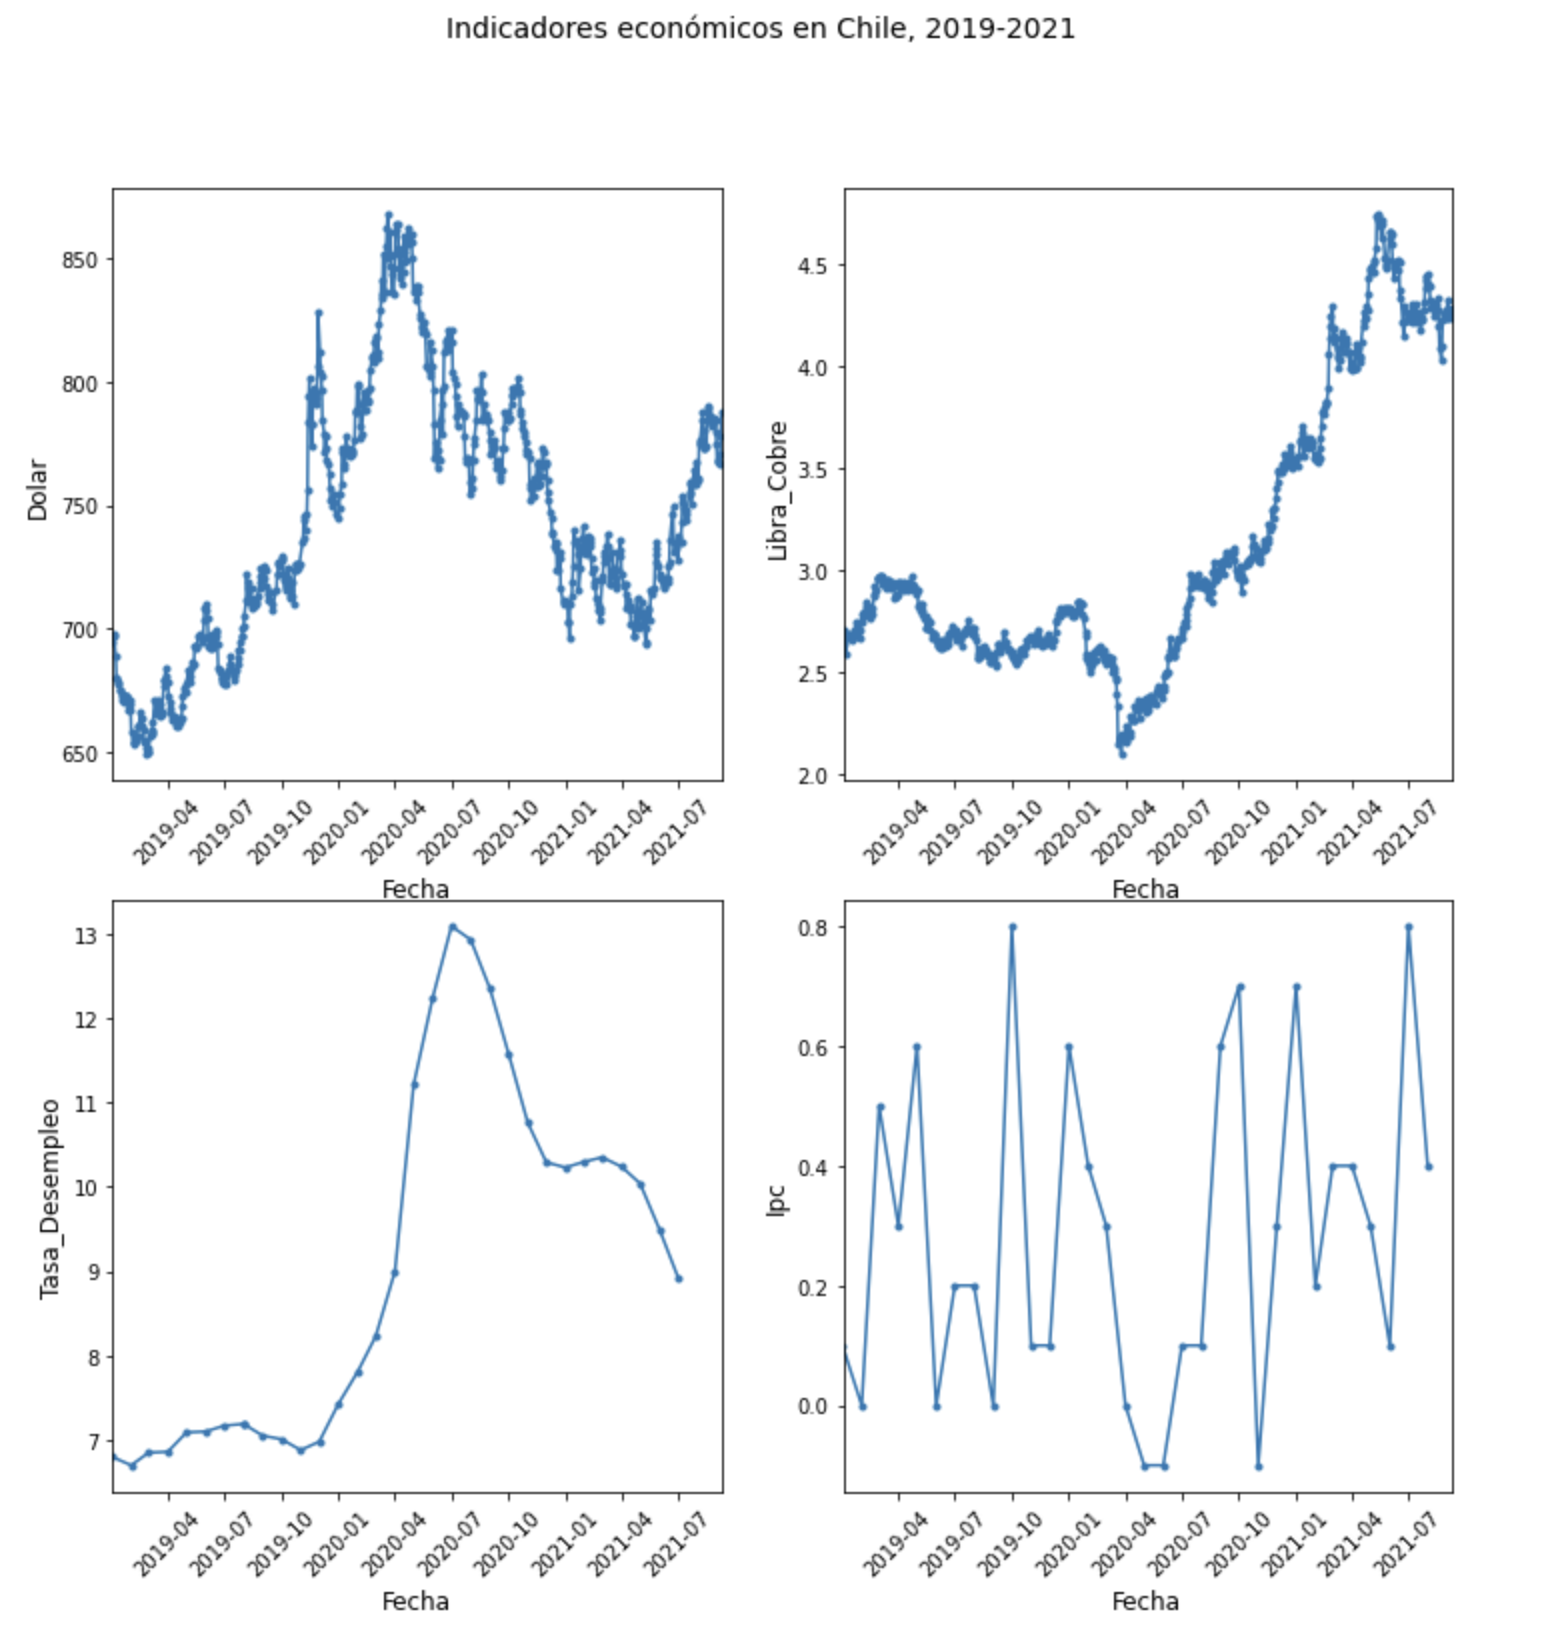
</div>

In [7]:
frames['ipc']

,fecha,valor
0,2019-12-01T03:00:00.000Z,0.1
1,2019-11-01T03:00:00.000Z,0.1
2,2019-10-01T03:00:00.000Z,0.8
3,2019-09-01T04:00:00.000Z,0.0
4,2019-08-01T04:00:00.000Z,0.2
5,2019-07-01T04:00:00.000Z,0.2
6,2019-06-01T04:00:00.000Z,0.0
7,2019-05-01T04:00:00.000Z,0.6
8,2019-04-01T03:00:00.000Z,0.3
9,2019-03-01T03:00:00.000Z,0.5


dolar
libra_cobre
tasa_desempleo
ipc


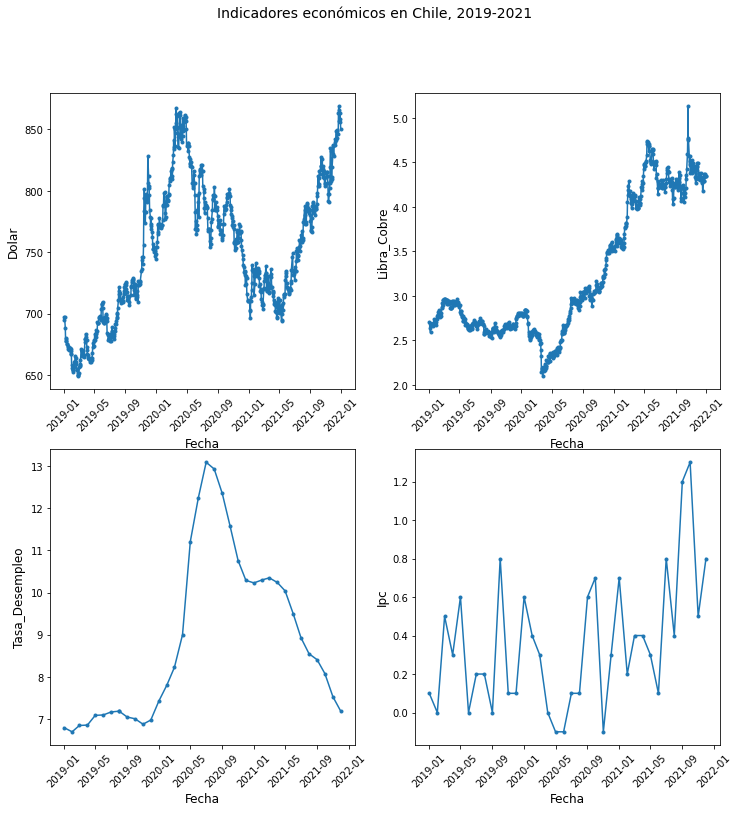

In [8]:
fig=plt.figure(figsize=(12,12))

for n,ind in enumerate(indicadores):
    print(ind)

    ax=fig.add_subplot(2,2,n+1)
    df=frames[ind]
    df['fecha']=pd.to_datetime(df['fecha'])
    df=df.sort_values(by='fecha')
    fecha=df['fecha']
    valor=df['valor']
    ax.plot(fecha,valor,'.-')
    ax.set_ylabel(ind.title(),fontsize=12)
    ax.set_xlabel('Fecha',fontsize=12)
    #ax.set_xlim(frames['dolar'].fecha.min(),frames['dolar'].fecha.max())
    plt.xticks(rotation=45)
fig.suptitle('Indicadores económicos en Chile, 2019-2021',fontsize=14);


## Ejemplo 3: Terremotos alrededor del mundo (USGS)

El Servicio Geológico de los Estados Unidos o USGS por sus siglas en inglés (United States Geological Survey), es una agencia científica del gobierno federal de los Estados Unidos, dedicada al estudio del medio ambiente y ecosistemas, recursos naturales, amenazas del cambio climático y peligros naturales que pueden afectar a las personas. 

El USGS es una institución líder a nivel mundial en sismología, y a través del programa *Earthquake Hazards* (https://earthquake.usgs.gov/) se ocupa de monitorear y reportar eventos sísmicos, evaluar la amenaza e impacto de terremotos, e investigar sobre sus causas y efectos. Dentro de sus múltiples herramientas y plataformas de información, cuenta con una API que entrega información en tiempo real de los sismos registrados alrededor del mundo:

https://earthquake.usgs.gov/fdsnws/event/1/?ref=springboard

En este ejericio, ud. extraerá data del USGS para analizar y visualizar la ocurrencia de terremotos de gran magnitud alrededor del mundo en las últimas dos décadas.

**2.1.** Usando la API del USGS, obtenga el listado de sismos de **magnitud mayor a 7** ocurridos en todo el mundo, desde el 1 de enero de 2000 a la fecha. Puede elegir el formato de respuesta de su preferencia. Consdiere que el formato GeoJSON es similar a JSON, sólo que en uno de sus campos incluye información de coordenadas geográficas.


In [9]:
url='https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2000-01-01&endtime=2021-09-02&minmagnitude=7.0'

r=requests.get(url)

dat=r.json()
dat

{'type': 'FeatureCollection',
 'metadata': {'generated': 1665719472000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2000-01-01&endtime=2021-09-02&minmagnitude=7.0',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.13.6',
  'count': 326},
 'features': [{'type': 'Feature',
   'properties': {'mag': 7.1,
    'place': 'South Sandwich Islands region',
    'time': 1629667998983,
    'updated': 1635864870040,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000f9sq',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000f9sq&format=geojson',
    'felt': 2,
    'cdi': 1,
    'mmi': 3.787,
    'alert': 'green',
    'status': 'reviewed',
    'tsunami': 1,
    'sig': 776,
    'net': 'us',
    'code': '6000f9sq',
    'ids': ',us6000f9sq,pt21234002,at00qy9fvn,usauto6000f9sq,',
    'sources': ',us,pt,at,usauto,',
    'types': ',dyfi,finite-fault,general-text,impact-link,internal-moment-tensor,in

**2.2.** Convierta los datos extraídos en un DataFrame con la siguiente estructura:

<div>
<img src="attachment:image.png" width="600"/>
</div>


In [10]:
df=pd.json_normalize(dat['features'])
df

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,us6000f9sq,7.1,South Sandwich Islands region,1629667998983,1635864870040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.0,...,",dyfi,finite-fault,general-text,impact-link,in...",NaN,9.799,0.39,32.0,mww,earthquake,M 7.1 - South Sandwich Islands region,Point,"[-24.8743, -60.2845, 6]"
1,Feature,us6000f65h,7.2,"Nippes, Haiti",1628944148454,1660684484534,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,363.0,...,",dyfi,earthquake-name,finite-fault,general-tex...",NaN,1.178,0.75,23.0,mww,earthquake,"M 7.2 - Nippes, Haiti",Point,"[-73.4822, 18.4335, 10]"
2,Feature,us6000f53e,8.1,South Sandwich Islands region,1628793317231,1652976332997,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",general-header,general-text,losspager,moment-...",NaN,7.463,0.76,78.0,mww,earthquake,M 8.1 - South Sandwich Islands region,Point,"[-25.2637, -58.3753, 22.79]"
3,Feature,us6000f4ly,7.5,South Sandwich Islands region,1628793172464,1635003979040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,3.0,...,",dyfi,general-header,general-text,ground-failu...",NaN,7.227,1.16,38.0,mww,earthquake,M 7.5 - South Sandwich Islands region,Point,"[-25.0316, -57.5674, 47.23]"
4,Feature,us6000f48v,7.1,"60 km ENE of Pondaguitan, Philippines",1628703973143,1638599092059,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,77.0,...,",dyfi,finite-fault,general-text,ground-failure...",NaN,1.273,1.27,25.0,mww,earthquake,"M 7.1 - 60 km ENE of Pondaguitan, Philippines",Point,"[126.7151, 6.4748, 55.14]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Feature,usp0009sbh,7.6,"89 km E of Luwuk, Indonesia",957414076210,1651259781382,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",finite-fault,focal-mechanism,general-text,imp...",NaN,NaN,1.14,NaN,mwc,earthquake,"M 7.6 - 89 km E of Luwuk, Indonesia",Point,"[123.573, -1.105, 26]"
322,Feature,usp0009rrc,7.0,"22 km NW of Añatuya, Argentina",956482043320,1651261061054,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",focal-mechanism,general-text,impact-text,mome...",NaN,NaN,0.89,NaN,mwb,earthquake,"M 7.0 - 22 km NW of Añatuya, Argentina",Point,"[-62.99, -28.307, 608.5]"
323,Feature,usp0009qb4,7.6,"Volcano Islands, Japan region",954241222510,1651257342761,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",finite-fault,focal-mechanism,general-text,imp...",NaN,NaN,1.22,NaN,mwc,earthquake,"M 7.6 - Volcano Islands, Japan region",Point,"[143.73, 22.338, 126.5]"
324,Feature,usp0009nxg,7.1,None,951443038640,1651257205979,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",focal-mechanism,general-text,moment-tensor,or...",NaN,NaN,1.20,NaN,mwc,earthquake,M 7.1 -,Point,"[173.818, -19.528, 33]"


## Ejemplo 4:  Webscrapping

Suponga que ud. ha decidido crear un emprendimiento comercial vendiendo tablets, ya que actualmente que son un producto muy demandado para el teletrabajo. Para ello, necesita hacer un estudio de mercado y analizar los precios de venta de la competencia.

En este ejercicio, ud. hará un scrapper de la página de la tienda PCFactory, específicamente del catálogo de tablets ubicado en la siguiente URL: https://www.pcfactory.cl/tablets?categoria=967&papa=636.

**3.1** Analice cuidadosamente el código HTML de la página y determine: ¿qué tag o atributo permite identificar el listado de productos con sus respectivas características (nombre, marca, precio)?

      

**Respuesta**: hay distintas opciones, dependiendo de cómo hayan inspeccionado la página e implementado el scrapper.
    
"<input type="hidden" id="data_mentalidad_web"" ==> listado con todos los productos y sus atributos

"<div class="product-list"> <div class="product" data-class="Caluga">" ==> grid que se puede iterar para extraer la información de cada producto

Cualquier alternativa (u otra es válida), en la medida que permita identificar la sección del código HTML que se debe extraer para hacer scarpping de todos los productos, y que sea coherente con lo implementado en la parte 3.2.

**3.2** Obtenga el código web de la página y extraiga la información de interés, de manera de llegar a un DataFrame.

In [16]:
import requests, json
import pandas as pd
from bs4 import BeautifulSoup 

main_url = " https://www.pcfactory.cl/tablets?categoria=967&papa=636"

session = requests.Session()
response = session.get(main_url)

result = requests.get(main_url,cookies=session.cookies)
soup = BeautifulSoup(result.text, 'html.parser')
catalog= soup.find_all('input',attrs={"id": "data_mentalidad_web"})
catalog

[<input data-type="json" id="data_mentalidad_web" type="hidden" value='[{"name":"Tablet Space 7\" 1GB 16GB WiFi Quad Core Android","id":"43812","price":"30890","brand":"Gear","category":"Tablets","variant":"","list":"Categor\u00edas","position":2},{"name":"Tablet Space 7\" 1GB 16GB WiFi Quad Core Android","id":"44178","price":"30890","brand":"Gear","category":"Tablets","variant":"","list":"Categor\u00edas","position":4},{"name":"Tablet Space 7\" 1GB 16GB WiFi Quad Core Android","id":"44247","price":"30890","brand":"Gear","category":"Tablets","variant":"","list":"Categor\u00edas","position":6},{"name":"Tablet Space Kids 7\" 1GB 16GB WiFi Quad Core Android + Carcasa Monster","id":"43813","price":"36090","brand":"Gear","category":"Tablets","variant":"","list":"Categor\u00edas","position":8},{"name":"Tablet Space Kids 7\" 1GB 16GB WiFi Quad Core Android + Carcasa Monster","id":"44188","price":"36090","brand":"Gear","category":"Tablets","variant":"","list":"Categor\u00edas","position":10},{

In [17]:
session = requests.Session()
response = session.get(main_url)
print(session.cookies)

<RequestsCookieJar[<Cookie Queue-it=u=d3d46ca3-145d-4617-a018-307d0c7cc389 for .queue-it.net/>, <Cookie Queue-it-pcfactory___________cyber202210=Cid=es-CL&f=0 for pcfactory.queue-it.net/>, <Cookie PHPSESSID=6qr2u5vn17aldoor09lgropfkh for www.pcfactory.cl/>, <Cookie QueueITAccepted-SDFrts345E-V3_cyber202210=EventId%3Dcyber202210%26QueueId%3D00000000-0000-0000-0000-000000000000%26RedirectType%3Dafterevent%26IssueTime%3D1665719661%26Hash%3D6bfba0ba729fcf5bb59fd938ccb56af97d9816c0cb779162123e5f56d9ad86ff for www.pcfactory.cl/>]>


In [18]:
products=catalog[0].attrs['value']

prods=json.loads(products)
prods

[{'name': 'Tablet Space 7" 1GB 16GB WiFi Quad Core Android',
  'id': '43812',
  'price': '30890',
  'brand': 'Gear',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 2},
 {'name': 'Tablet Space 7" 1GB 16GB WiFi Quad Core Android',
  'id': '44178',
  'price': '30890',
  'brand': 'Gear',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 4},
 {'name': 'Tablet Space 7" 1GB 16GB WiFi Quad Core Android',
  'id': '44247',
  'price': '30890',
  'brand': 'Gear',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 6},
 {'name': 'Tablet Space Kids 7" 1GB 16GB WiFi Quad Core Android + Carcasa Monster',
  'id': '43813',
  'price': '36090',
  'brand': 'Gear',
  'category': 'Tablets',
  'variant': '',
  'list': 'Categorías',
  'position': 8},
 {'name': 'Tablet Space Kids 7" 1GB 16GB WiFi Quad Core Android + Carcasa Monster',
  'id': '44188',
  'price': '36090',
  'brand': 'Gear',
  'category': 'Tablets',
  'varia

In [19]:
df=pd.DataFrame(columns=['name', 'id', 'price', 'brand','variant','list'])
for prod in prods:
    df=df.append({'name':prod['name'], 'id':prod['id'], 'price':prod['price'], 'brand':prod['brand'],'variant':prod['variant'],'list':prod['list']},ignore_index=True)

df.to_csv('productos.csv')